<a href="https://colab.research.google.com/github/GeorgievskaEmilija/Data-Science-Lab-Exercises/blob/main/183044_Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<font size = 4 color='Orange'>
Learning Goals</font>

<font color = 'Orange' size = 3 >In this Exercise your goal is to make a good solution for the active competition on kaggle: https://www.kaggle.com/c/nlp-getting-started/overview

<font color = 'Orange' size = 3 > In order to download the Datasets you will need to join and accept the terms and conditions of the competition. </foont>

You need to report the parameters for the best three models into a table that will contain the model architecture and F1 score.
</font>

<font color = 'Orange' size = 4 > Structure of the Dataset </font>

<font color = 'Orange' size = 3>
The Dataset it's divided on two parts for training and testing. For the testing part you need to map the id's with the sample_submission.csv, where the target column is located.</li>
</font>

<font color = 'Orange' size = 4 >Instructions</font>
<ul>
<font color = 'Orange'>
Try to train different kinds of NN's structures

<li>Choose the number of layers your model will have</li>
<li>Add Embedding Layer for the text</li>
<li>Choose the types of layers your model will have: CNN, LSTM, GRU, RNN, Dense,...</li>
<li>Choose the number of neurons in each hidden layer</li>
<li>Choose activation function for each layer: relu, sigmoid, softmax, softsign, linear,... </li>
<li>Choose the loss function for compiling: mean_squared_error, mean_absolute_error, root_mean_squared_error,....</li>
<li>Choose the optimizer function for compiling: adam, adagrad, adamax, sgd,....</li>
<li>Choose the number of epochs and the batch size for the training part</li>
</ul>

</font>
<font color = 'Orange' size = 4 >
Report the parameters of the three best models in a table with the given columns:
</font>
<ul>
<font color = 'Orange'>
<li>Number of the model</li>
<li>Number of layers</li>
<li>Types of layers</li>
<li>Activation function for each layer</li>
<li>Number of epochs</li>
<li>Batch size</li>
<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>F1 score for the prediction of the test part (this is the metric for rating the models)</li>
</ul>
<font color = 'Orange' size = 4 >Transformers based models</font>

<font color = 'Orange' size = 3 > Create a model that will use some of the pretrained BERT, RoBERTa, XLNet, XLM ... models for Text Classification [Hugging Face](https://huggingface.co/transformers/quicktour.html). 

Report the following parameters for models based on Transformers</font>
<ul>
<font color='orange'>
<li> Pretrained model</li>

<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>F1 score for the prediction of the test part (this is the metric for rating the models)
</li>

</ul>
</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
sample_submission=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sample_submission.csv")


In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [ ]:
train.drop(columns=['keyword', 'location'], axis=1, inplace=True)
test.drop(columns=['keyword', 'location'], axis=1, inplace=True)

In [ ]:
test=pd.merge(test, sample_submission,how="left", on='id')

In [ ]:
test.head()

,id,text,target
0,0,Just happened a terrible car crash,0
1,2,"Heard about #earthquake is different cities, s...",0
2,3,"there is a forest fire at spot pond, geese are...",0
3,9,Apocalypse lighting. #Spokane #wildfires,0
4,11,Typhoon Soudelor kills 28 in China and Taiwan,0


In [ ]:
from sklearn.model_selection import train_test_split

X = train['text']
Y = pd.get_dummies(train['target']).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)


In [ ]:
from keras_preprocessing.text import Tokenizer

max_features = 20000

tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(X_train))

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

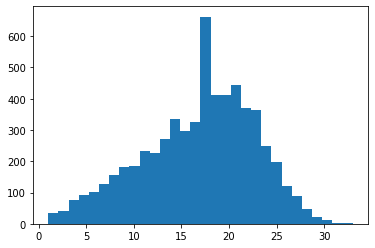

MAX WORDS IN ONE TEXT:  33


In [ ]:
import matplotlib.pyplot as plt

totalNumWords = [len(text) for text in X_train]
plt.hist(totalNumWords,bins = 30)
plt.show()
maxWords=max(totalNumWords)
print("MAX WORDS IN ONE TEXT: " ,maxWords)

In [ ]:
from keras.preprocessing import sequence
maxWords = 40 #da se ostavi malku prostor 
X_train = sequence.pad_sequences(X_train, maxlen=maxWords)
X_test = sequence.pad_sequences(X_test, maxlen=maxWords)


In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM, Flatten
from sklearn.metrics import f1_score, classification_report
from collections import OrderedDict


In [ ]:
#MODEL 1

K.clear_session()
model = Sequential()

model.add(Embedding(max_features, 110, input_length=X_train.shape[1]))
model.add(Conv1D(filters=30, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=30, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))    
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

#kompajliranje
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#istorija
model_history = model.fit(X_train, Y_train,  epochs=6, batch_size=80, verbose=2, validation_split=0.2)

y_pred = model.predict(X_test)
y_pred = y_pred
score = f1_score(np.argmax(Y_test,axis=1), np.argmax(y_pred,axis=1))

#dict
modeldict1=OrderedDict()
modeldict1["Model no"] = 1
modeldict1["Number of layers"] = 7
modeldict1['Layer type and activation'] = ['1: Embedding', '2: Conv1d - relu', '3: MaxPooling1D', '4: Conv1d - relu', '5: MaxPooling1D', '6: LSTM', '7: Dense - softmax']
modeldict1['Epochs'] = 6
modeldict1['Batch size'] = 80
modeldict1['Loss func'] = 'categorical_crossentropy'
modeldict1['Optimizer'] = 'adam'
modeldict1['F1 Score']=score

Epoch 1/6
61/61 - 7s - loss: 0.6505 - accuracy: 0.6024 - val_loss: 0.5439 - val_accuracy: 0.7307
Epoch 2/6
61/61 - 4s - loss: 0.3747 - accuracy: 0.8413 - val_loss: 0.4473 - val_accuracy: 0.8005
Epoch 3/6
61/61 - 4s - loss: 0.1401 - accuracy: 0.9514 - val_loss: 0.5615 - val_accuracy: 0.7972
Epoch 4/6
61/61 - 4s - loss: 0.0545 - accuracy: 0.9840 - val_loss: 0.6967 - val_accuracy: 0.7783
Epoch 5/6
61/61 - 4s - loss: 0.0306 - accuracy: 0.9916 - val_loss: 0.8302 - val_accuracy: 0.7915
Epoch 6/6
61/61 - 4s - loss: 0.0184 - accuracy: 0.9947 - val_loss: 0.8195 - val_accuracy: 0.7816


In [ ]:
#MODEL 2

K.clear_session()
model = Sequential()

model.add(Embedding(max_features, 150, input_length=X_train.shape[1]))
model.add(Conv1D(filters=25, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=25, kernel_size=3, padding='same', activation='relu'))
model.add(LSTM(120, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

#kompajliranje
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#istorija
model_history = model.fit(X_train, Y_train,  epochs=7, batch_size=90, verbose=2, validation_split=0.2)

y_pred2 = model.predict(X_test)
y_pred2 = y_pred2
score = f1_score(np.argmax(Y_test,axis=1), np.argmax(y_pred2,axis=1))

#dict
modeldict2=OrderedDict()
modeldict2["Model no"] = 2
modeldict2["Number of layers"] = 6
modeldict2['Layer type and activation'] = ['1: Embedding', '2: Conv1d - relu', '3: MaxPooling1D', '4: Conv1d - relu',  '5: LSTM', '6: Dense - softmax']
modeldict2['Epochs'] = 7
modeldict2['Batch size'] = 90
modeldict2['Loss func'] = 'categorical_crossentropy'
modeldict2['Optimizer'] = 'adam'
modeldict2['F1 Score']=score

Epoch 1/7
55/55 - 9s - loss: 0.6357 - accuracy: 0.6223 - val_loss: 0.5133 - val_accuracy: 0.7455
Epoch 2/7
55/55 - 6s - loss: 0.3102 - accuracy: 0.8781 - val_loss: 0.5049 - val_accuracy: 0.7898
Epoch 3/7
55/55 - 6s - loss: 0.1153 - accuracy: 0.9631 - val_loss: 0.6223 - val_accuracy: 0.7258
Epoch 4/7
55/55 - 6s - loss: 0.0591 - accuracy: 0.9832 - val_loss: 0.7008 - val_accuracy: 0.7791
Epoch 5/7
55/55 - 6s - loss: 0.0357 - accuracy: 0.9897 - val_loss: 0.8440 - val_accuracy: 0.7504
Epoch 6/7
55/55 - 6s - loss: 0.0256 - accuracy: 0.9932 - val_loss: 0.8229 - val_accuracy: 0.7315
Epoch 7/7
55/55 - 6s - loss: 0.0190 - accuracy: 0.9934 - val_loss: 0.7927 - val_accuracy: 0.7562


In [ ]:
#MODEL 3

K.clear_session()
model = Sequential()

model.add(Embedding(max_features, 120, input_length=X_train.shape[1]))
model.add(Conv1D(filters=40, kernel_size=3, padding='same', activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=20, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=10, kernel_size=3, padding='same', activation='softmax'))
model.add(Dense(100, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(30, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(2, activation='softmax'))

#kompajliranje
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
#istorija
model_history = model.fit(X_train, Y_train,  epochs=8, batch_size=150, verbose=2, validation_split=0.2)

y_pred3 = model.predict(X_test)
y_pred3 = y_pred3.round()

score = f1_score(np.argmax(Y_test,axis=1), np.argmax(y_pred3,axis=1))

#dict
modeldict3=OrderedDict()
modeldict3["Model no"] = 3
modeldict3["Number of layers"] = 11
modeldict3['Layer type and activation'] = ['1: Embedding', '2: Conv1d - relu', '3: Dense - Relu',  '4: MaxPooling1D',   '5: Conv1d - relu', '6: MaxPooling1D',
                                           '7: Conv1d - softmax','8: Dense - relu', '9: MaxPooling1D', '10: LSTM', '11: Dense - softmax']
modeldict3['Epochs'] = 8
modeldict3['Batch size'] = 150
modeldict3['Loss func'] = 'mse'
modeldict3['Optimizer'] = 'adam'
modeldict3['F1 Score']=score

Epoch 1/8
33/33 - 6s - loss: 0.2452 - accuracy: 0.5720 - val_loss: 0.2475 - val_accuracy: 0.5525
Epoch 2/8
33/33 - 3s - loss: 0.2449 - accuracy: 0.5720 - val_loss: 0.2470 - val_accuracy: 0.5525
Epoch 3/8
33/33 - 3s - loss: 0.2345 - accuracy: 0.5796 - val_loss: 0.2102 - val_accuracy: 0.7028
Epoch 4/8
33/33 - 3s - loss: 0.1263 - accuracy: 0.8452 - val_loss: 0.1727 - val_accuracy: 0.7521
Epoch 5/8
33/33 - 3s - loss: 0.0431 - accuracy: 0.9452 - val_loss: 0.1775 - val_accuracy: 0.7775
Epoch 6/8
33/33 - 3s - loss: 0.0205 - accuracy: 0.9762 - val_loss: 0.1975 - val_accuracy: 0.7471
Epoch 7/8
33/33 - 3s - loss: 0.0124 - accuracy: 0.9865 - val_loss: 0.2046 - val_accuracy: 0.7447
Epoch 8/8
33/33 - 3s - loss: 0.0083 - accuracy: 0.9910 - val_loss: 0.2060 - val_accuracy: 0.7438


In [ ]:
#MODEL 4

K.clear_session()
model = Sequential()

model.add(Embedding(max_features, 120, input_length=X_train.shape[1]))
model.add(Conv1D(filters=40, kernel_size=3, padding='same', activation='softmax'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(30, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

#kompajliranje
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
#istorija
model_history = model.fit(X_train, Y_train,  epochs=10, batch_size=200, verbose=2, validation_split=0.2)

y_pred4 = model.predict(X_test)
y_pred4 = y_pred4.round()

score = f1_score(np.argmax(Y_test,axis=1), np.argmax(y_pred4,axis=1))

#dict
modeldict4=OrderedDict()
modeldict4["Model no"] = 4
modeldict4["Number of layers"] = 11
modeldict4['Layer type and activation'] = ['1: Embedding', '2: Conv1d - softmax', '3: Dense - Relu',  '4: Dense - Relu',   '5: MaxPooling1D', '6: LSTM',
                                           '7: Dense - softmax']
modeldict4['Epochs'] = 10
modeldict4['Batch size'] = 200
modeldict4['Loss func'] = 'mse'
modeldict4['Optimizer'] = 'adam'
modeldict4['F1 Score']=score

Epoch 1/10
25/25 - 6s - loss: 0.2465 - accuracy: 0.5610 - val_loss: 0.2480 - val_accuracy: 0.5525
Epoch 2/10
25/25 - 3s - loss: 0.2446 - accuracy: 0.5720 - val_loss: 0.2468 - val_accuracy: 0.5525
Epoch 3/10
25/25 - 3s - loss: 0.2418 - accuracy: 0.5720 - val_loss: 0.2375 - val_accuracy: 0.5525
Epoch 4/10
25/25 - 3s - loss: 0.2085 - accuracy: 0.6624 - val_loss: 0.1908 - val_accuracy: 0.7126
Epoch 5/10
25/25 - 3s - loss: 0.1443 - accuracy: 0.8009 - val_loss: 0.1654 - val_accuracy: 0.7627
Epoch 6/10
25/25 - 3s - loss: 0.0776 - accuracy: 0.9000 - val_loss: 0.1677 - val_accuracy: 0.7611
Epoch 7/10
25/25 - 3s - loss: 0.0380 - accuracy: 0.9505 - val_loss: 0.1733 - val_accuracy: 0.7635
Epoch 8/10
25/25 - 3s - loss: 0.0254 - accuracy: 0.9713 - val_loss: 0.1726 - val_accuracy: 0.7718
Epoch 9/10
25/25 - 3s - loss: 0.0171 - accuracy: 0.9805 - val_loss: 0.1842 - val_accuracy: 0.7652
Epoch 10/10
25/25 - 3s - loss: 0.0129 - accuracy: 0.9856 - val_loss: 0.1827 - val_accuracy: 0.7742


In [ ]:
#MODEL 5

K.clear_session()
model = Sequential()

model.add(Embedding(max_features, 100, input_length=X_train.shape[1]))
model.add(Conv1D(filters=15, kernel_size=3, padding='same', activation='relu'))
model.add(LSTM(30, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='relu'))

#kompajliranje
model.compile(loss='mse', optimizer='adamax', metrics=['accuracy'])
#istorija
model_history = model.fit(X_train, Y_train,  epochs=9, batch_size=220, verbose=2, validation_split=0.2)

y_pred5 = model.predict(X_test)
y_pred5 = y_pred5.round()

score = f1_score(np.argmax(Y_test,axis=1), np.argmax(y_pred4,axis=1))

#dict
modeldict5=OrderedDict()
modeldict5["Model no"] = 5
modeldict5["Number of layers"] = 11
modeldict5['Layer type and activation'] = ['1: Embedding', '2: Conv1d - relu', '3: LSTM',  '4: Dense - Relu',   '5: Dense - relu']
modeldict5['Epochs'] = 9
modeldict5['Batch size'] = 220
modeldict5['Loss func'] = 'mse'
modeldict5['Optimizer'] = 'adamax'
modeldict5['F1 Score']=score

Epoch 1/9
23/23 - 5s - loss: 0.4248 - accuracy: 0.4308 - val_loss: 0.2971 - val_accuracy: 0.4475
Epoch 2/9
23/23 - 2s - loss: 0.2579 - accuracy: 0.5273 - val_loss: 0.2487 - val_accuracy: 0.5525
Epoch 3/9
23/23 - 2s - loss: 0.2421 - accuracy: 0.5720 - val_loss: 0.2404 - val_accuracy: 0.5525
Epoch 4/9
23/23 - 2s - loss: 0.2328 - accuracy: 0.6016 - val_loss: 0.2299 - val_accuracy: 0.5747
Epoch 5/9
23/23 - 2s - loss: 0.2172 - accuracy: 0.6539 - val_loss: 0.2121 - val_accuracy: 0.6667
Epoch 6/9
23/23 - 2s - loss: 0.1978 - accuracy: 0.6958 - val_loss: 0.1965 - val_accuracy: 0.6897
Epoch 7/9
23/23 - 2s - loss: 0.1724 - accuracy: 0.7551 - val_loss: 0.1755 - val_accuracy: 0.7422
Epoch 8/9
23/23 - 2s - loss: 0.1388 - accuracy: 0.8177 - val_loss: 0.1591 - val_accuracy: 0.7750
Epoch 9/9
23/23 - 2s - loss: 0.1146 - accuracy: 0.8502 - val_loss: 0.1525 - val_accuracy: 0.7964


In [ ]:
from operator import itemgetter
allmodels=[]
allmodels.append(modeldict1)
allmodels.append(modeldict2)
allmodels.append(modeldict3)
allmodels.append(modeldict4)
allmodels.append(modeldict5)

newlist = sorted(allmodels, key=lambda k: k['F1 Score'],reverse=True) 
best=newlist[:3]

matrix = []
for i in range(0,3):
  matrix.append(list(best[i].values()))
df = pd.DataFrame(np.array(matrix), columns=list(modeldict1.keys()))
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


,Model no,Number of layers,Layer type and activation,Epochs,Batch size,Loss func,Optimizer,F1 Score
0,1,7,"[1: Embedding, 2: Conv1d - relu, 3: MaxPooling...",6,80,categorical_crossentropy,adam,0.710717
1,3,11,"[1: Embedding, 2: Conv1d - relu, 3: Dense - Re...",8,150,mse,adam,0.699377
2,4,11,"[1: Embedding, 2: Conv1d - softmax, 3: Dense -...",10,200,mse,adam,0.692241


**TRANSFORMERS**

In [ ]:
pip install transformers

     |████████████████████████████████| 1.5MB 7.3MB/s 
     |████████████████████████████████| 890kB 27.8MB/s 
     |████████████████████████████████| 2.9MB 41.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=6bbc09129673c6fdfc238045f8fb88420b67553de6b45421b3705a0913878bb9
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
pip install pytorch_transformers


     |████████████████████████████████| 184kB 6.8MB/s 
     |████████████████████████████████| 1.1MB 12.2MB/s 
     |████████████████████████████████| 133kB 26.2MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
     |████████████████████████████████| 7.2MB 19.7MB/s 
ERROR: botocore 1.19.49 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.


In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
sentences = data.text.values
sentences

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
       'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(data.index.values, 
                                                  data.target.values, 
                                                  test_size=0.15, 
                                                  random_state=42,
                                                  stratify=data.target.values)

In [ ]:
data['data_type'] = ['not_set']*data.shape[0]
data.loc[X_train, 'data_type'] = 'train'
data.loc[X_val, 'data_type'] = 'validation'


In [ ]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased',
    do_lower_case=True
)

import torch
encoded_data_train = tokenizer.batch_encode_plus(
    data[data.data_type=='train'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
   data[data.data_type=='validation'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(data[data.data_type=='train'].target.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(data[data.data_type=='validation'].target.values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val, 
                            attention_masks_val,
                           labels_val)

In [ ]:
from transformers import BertForSequenceClassification
label_dict = {}
possible_labels = data.target.unique()

for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [ ]:
model = BertForSequenceClassification.from_pretrained(
                                      'bert-base-uncased', 
                                      num_labels = len(label_dict),
                                      output_attentions = False,
                                      output_hidden_states = False
                                     )

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
batch_size = 4
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

dataloader_train = DataLoader(
    dataset_train,
    sampler=RandomSampler(dataset_train),
    batch_size=batch_size
)

dataloader_val = DataLoader(
    dataset_val,
    sampler=RandomSampler(dataset_val),
    batch_size=32
)

In [ ]:
from transformers import AdamW
optimizer = AdamW(
    model.parameters(),
    lr = 1e-5,
    eps = 1e-8
)

In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 1
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps = len(dataloader_train)*epochs
)

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

In [ ]:
 def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted') 

In [ ]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
from tqdm.notebook import tqdm

for epoch in tqdm(range(1, epochs+1)):
    model.train()
    loss_train_total = 0
    
    progress_bar = tqdm(dataloader_train, 
                        desc='Epoch {:1d}'.format(epoch), 
                        leave=False, 
                        disable=False)
    
    for batch in progress_bar:
        model.zero_grad()
        batch = tuple(b.to(device) for b in batch)
        inputs = {
            'input_ids': batch[0],
            'attention_mask': batch[1],
            'labels': batch[2]
        }
        
        outputs = model(**inputs)
        loss = outputs[0]
        loss_train_total +=loss.item()
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})     
    
    #torch.save(model.state_dict(), f'Models/BERT_ft_Epoch{epoch}.model')
    

    
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)
    print(f'Validation loss: {val_loss}')
    print(f'F1 Score (weighted): {val_f1}')

In [ ]:
model.eval()